# AMAZON STOCKS ANALYSES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

%matplotlib notebook

## Connecting to the API and gathering the data

In [2]:
# Parameters to connect the API
key = 'apikey# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key, output_format='pandas')

# amzn_data is a pandas dataframe, amzn_meta_data is a dict
amzn_data, amzn_meta_data = ts.get_daily(symbol='AMZN', outputsize='full')
# amzn_sma is a dict, amzn_meta_sma also a dict
amzn_sma, amzn_meta_sma = ti.get_sma(symbol='AMZN')

### Visualitzation data

In [3]:
amzn_data.head(5)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-01-03,1864.50,1886.20,1864.50,1874.97,3766604.0
2020-01-02,1875.00,1898.01,1864.15,1898.01,4035910.0
2019-12-31,1842.00,1853.26,1832.23,1847.84,2510380.0
2019-12-30,1874.00,1884.00,1840.62,1846.89,3677306.0
2019-12-27,1882.92,1901.40,1866.01,1869.80,6188754.0


In [4]:
# Show some info about the data set
amzn_data.info()
amzn_data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2020-01-03 to 2000-01-04
Data columns (total 5 columns):
1. open      5032 non-null float64
2. high      5032 non-null float64
3. low       5032 non-null float64
4. close     5032 non-null float64
5. volume    5032 non-null float64
dtypes: float64(5)
memory usage: 235.9 KB


,1. open,2. high,3. low,4. close,5. volume
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,361.751644,365.452368,357.542088,361.690535,6.537283e+06
std,519.000913,523.374833,513.531489,518.688868,5.158930e+06
min,5.910000,6.100000,5.510000,5.970000,8.813370e+05
25%,40.395000,41.250000,39.750000,40.455000,3.636801e+06
50%,120.220000,122.380000,117.818000,120.095000,5.416496e+06
75%,376.185000,379.340000,373.242500,375.462500,7.811038e+06
max,2038.110000,2050.500000,2013.000000,2039.510000,1.043292e+08


In [5]:
# Rename columns
amzn_data.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', 
                          '4. close': 'close', '5. volume': 'volume'}, inplace=True)
amzn_data

,open,high,low,close,volume
date,,,,,
2020-01-03,1864.50,1886.20,1864.50,1874.97,3766604.0
2020-01-02,1875.00,1898.01,1864.15,1898.01,4035910.0
2019-12-31,1842.00,1853.26,1832.23,1847.84,2510380.0
2019-12-30,1874.00,1884.00,1840.62,1846.89,3677306.0
2019-12-27,1882.92,1901.40,1866.01,1869.80,6188754.0
...,...,...,...,...,...
2000-01-10,72.56,72.63,65.56,69.19,14757900.0
2000-01-07,67.00,70.50,66.19,69.56,10505400.0
2000-01-06,71.31,72.69,64.00,65.56,18752000.0


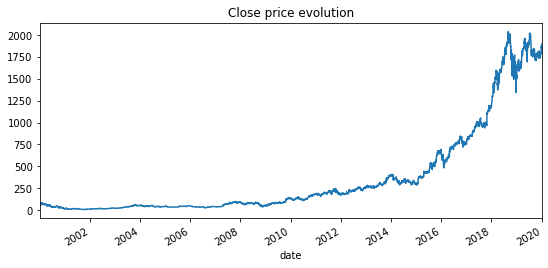

In [6]:
# Line plot of closing prieces
amzn_data['close'].plot(figsize=(9,4), title='Close price evolution')

### Exploting Data 

In [7]:
# Resample data in Months intervals
amzn_data_month = amzn_data.resample('M', label='right').agg({'open': np.mean, 'high': np.mean, 
                                                              'low': np.mean, 'close': np.mean, 
                                                              'volume': np.sum})
amzn_data_month

,open,high,low,close,volume
date,,,,,
2000-01-31,67.860526,70.212105,64.922105,67.033158,246091400.0
2000-02-29,72.382000,74.802500,70.019000,72.464000,207457700.0
2000-03-31,66.186087,68.150000,64.222174,66.482609,156584600.0
2000-04-30,56.712105,59.547895,53.489474,56.376842,162012500.0
2000-05-31,53.750000,55.848182,51.110000,53.769091,130688600.0
...,...,...,...,...,...
2019-09-30,1801.716000,1812.319000,1784.686000,1799.121000,62003799.0
2019-10-31,1749.089130,1763.666957,1736.604783,1752.331739,71821008.0
2019-11-30,1775.338000,1784.218000,1764.300500,1774.294000,52060472.0


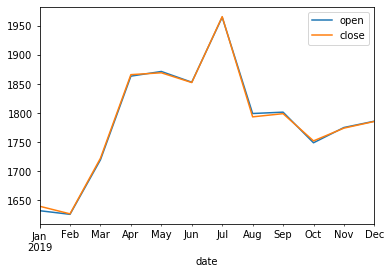

In [8]:
# Open and Close from last year (2019)
amzn_data_month.loc['2019-01-31': '2019-12-31', ['open', 'close']].plot()

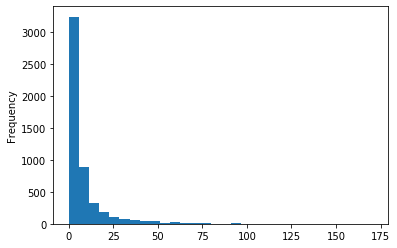

In [9]:
plt.figure()  # Specify it in case the plot is not showed
# Get the differents between high and low prices to see volatility
diff = amzn_data['high'] - amzn_data['low']
diff.plot(kind='hist', bins=30)

In [10]:
# Get the date of maxim different in the data set
diff.idxmax()

Timestamp('2018-10-29 00:00:00')

In [11]:
# Reset index to have date as a column of the dataframe
amzn_data_no_data_index = amzn_data.reset_index()
amzn_data_no_data_index[amzn_data_no_data_index['date'] == '2018-10-29']

,date,open,high,low,close,volume
296,2018-10-29,1660.0,1665.74,1495.0,1538.88,13866077.0


## Build a candle plot

In [12]:
# Just work for values 2019
amzn_data_2019 = amzn_data_no_data_index[(amzn_data_no_data_index['date'] > '2019-01-01') & 
                                         (amzn_data_no_data_index['date'] < '2019-12-31')]

In [13]:
amzn_data_2019.set_index('date')

,open,high,low,close,volume
date,,,,,
2019-12-30,1874.00,1884.00,1840.62,1846.89,3677306.0
2019-12-27,1882.92,1901.40,1866.01,1869.80,6188754.0
2019-12-26,1801.01,1870.46,1799.50,1868.77,6024608.0
2019-12-24,1793.81,1795.57,1787.58,1789.21,881337.0
2019-12-23,1788.26,1793.00,1784.51,1793.00,2137493.0
...,...,...,...,...,...
2019-01-08,1664.69,1676.61,1616.61,1656.58,8881428.0
2019-01-07,1602.31,1634.56,1589.18,1629.51,7993213.0
2019-01-04,1530.00,1594.00,1518.31,1575.39,9182575.0


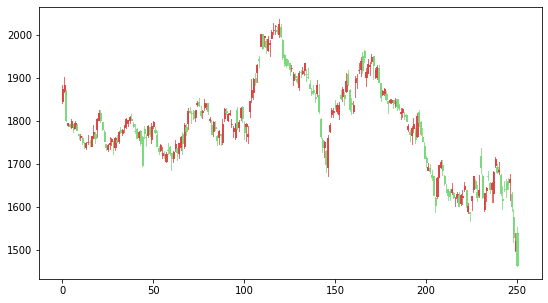

In [14]:
from mpl_finance import candlestick2_ohlc
fig, ax1 = plt.subplots(1, 1, figsize=(9,5))
c1 = candlestick2_ohlc(ax=ax1, opens=amzn_data_2019['open'], highs=amzn_data_2019['high'],
                       lows=amzn_data_2019['low'], closes=amzn_data_2019['close'], width=.6, 
                       colorup='#77d879', colordown='#db3f3f')

### Adding a Simple Moving Average

In [19]:
# Adding the Moving Average
amzn_data_2019['mean'] = (amzn_data_2019.loc[:]['open'] + amzn_data_2019.loc[:]['close']) / 2
amzn_data_2019

/home/didac/anaconda3/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,open,high,low,close,volume,mean
3,2019-12-30,1874.00,1884.00,1840.62,1846.89,3677306.0,1860.445
4,2019-12-27,1882.92,1901.40,1866.01,1869.80,6188754.0,1876.360
5,2019-12-26,1801.01,1870.46,1799.50,1868.77,6024608.0,1834.890
6,2019-12-24,1793.81,1795.57,1787.58,1789.21,881337.0,1791.510
7,2019-12-23,1788.26,1793.00,1784.51,1793.00,2137493.0,1790.630
...,...,...,...,...,...,...,...
249,2019-01-08,1664.69,1676.61,1616.61,1656.58,8881428.0,1660.635
250,2019-01-07,1602.31,1634.56,1589.18,1629.51,7993213.0,1615.910
251,2019-01-04,1530.00,1594.00,1518.31,1575.39,9182575.0,1552.695
252,2019-01-03,1520.01,1538.00,1497.11,1500.28,6975572.0,1510.145


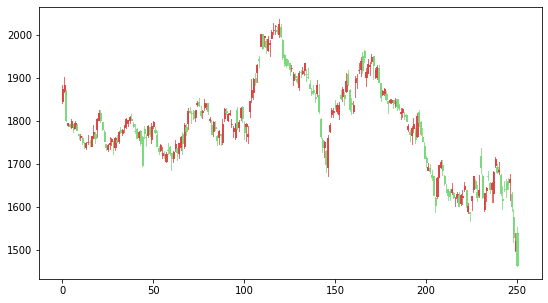

In [20]:
rolling_mean_10 = amzn_data_2019['mean'].rolling(window=10).mean()
rolling_mean_30 = amzn_data_2019['mean'].rolling(window=30).mean()
fig, ax1 = plt.subplots(1, 1, figsize=(9,5))
c1 = candlestick2_ohlc(ax=ax1, opens=amzn_data_2019['open'], highs=amzn_data_2019['high'],
                       lows=amzn_data_2019['low'], closes=amzn_data_2019['close'], width=.6, 
                       colorup='#77d879', colordown='#db3f3f')

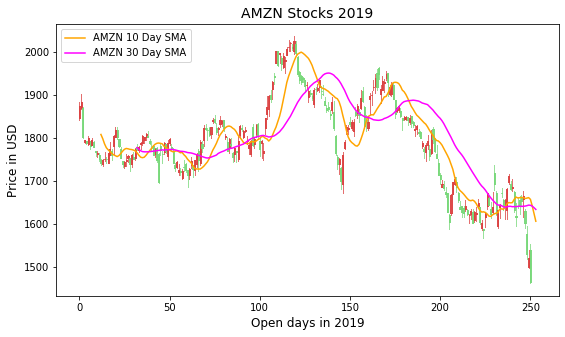

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
#plt.plot(amzn_data_2019.index, amzn_data_2019['close'], label='AMZN')
plt.plot(amzn_data_2019.index, rolling_mean_10, label='AMZN 10 Day SMA', color='orange')
plt.plot(amzn_data_2019.index, rolling_mean_30, label='AMZN 30 Day SMA', color='magenta')
c1 = candlestick2_ohlc(ax=ax, opens=amzn_data_2019['open'], highs=amzn_data_2019['high'],
                       lows=amzn_data_2019['low'], closes=amzn_data_2019['close'], width=.6, 
                       colorup='#77d879', colordown='#db3f3f')
plt.xlabel('Open days in 2019', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title('AMZN Stocks 2019', fontsize=14)
plt.legend(loc='upper left')
plt.show()

### Exponential Moving Average

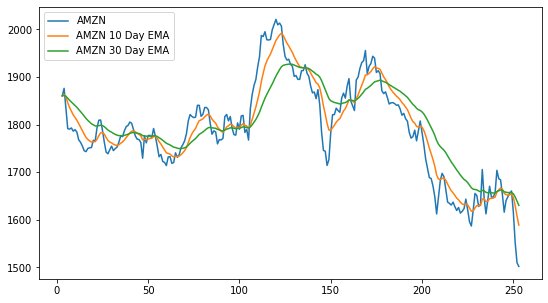

In [18]:
# Defining the two exponential moving avarage
exp_10 = amzn_data_2019['mean'].ewm(span=10, adjust=False).mean()
exp_30 = amzn_data_2019['mean'].ewm(span=30, adjust=False).mean()
# Plotting
fig = plt.subplots(1, 1, figsize=(9,5))
plt.plot(amzn_data_2019.index, amzn_data_2019['mean'], label='AMZN')
plt.plot(amzn_data_2019.index, exp_10, label='AMZN 10 Day EMA')
plt.plot(amzn_data_2019.index, exp_30, label='AMZN 30 Day EMA')
plt.legend(loc='upper left')
plt.show()